In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)
data = np.random.randn(10_000)

In [5]:
data.min(), data.max()

(-3.740100637951779, 3.8016602149671153)

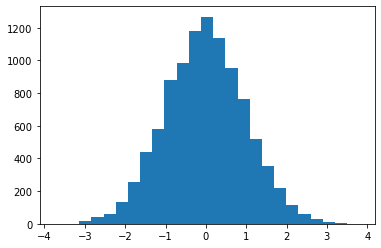

In [9]:
plt.hist(data, bins=25);

In [11]:
avg = np.mean(data)
_std = np.std(data)
avg, _std

(-0.018433720158265818, 0.9875565681761208)

In [12]:
range_left = avg - 3*_std
range_right = avg + 3*_std
range_left, range_right 

(-2.981103424686628, 2.9442359843700965)

In [14]:
len( data[ (data>range_left)&(data<range_right) ] )

9975

In [15]:
range_left = avg - 2*_std
range_right = avg + 2*_std
len( data[ (data>range_left)&(data<range_right) ] )

9549

In [16]:
df = pd.read_csv("http://51.91.120.89/extras/pokemon.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [17]:
import seaborn as sns

<AxesSubplot:xlabel='Attack', ylabel='Type 1'>

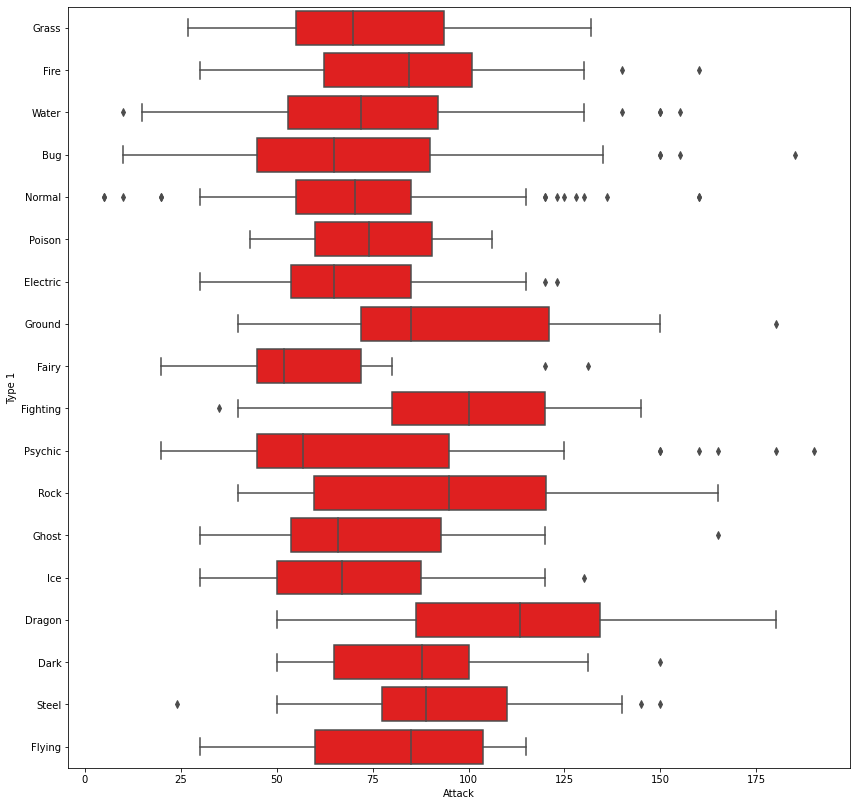

In [20]:
plt.figure(figsize=(14,14))
sns.boxplot(data=df, x="Attack", y="Type 1", color="r", whis=1)

In [31]:
df1 = df.query(" `Type 1`=='Normal' ")
df1.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,319.173469,401.683673,77.27551,73.469388,59.846939,55.816327,63.724490,71.551020,3.051020
std,193.854820,115.733038,36.23343,30.295862,23.771833,23.946395,25.142801,28.406157,1.575407
min,16.000000,190.000000,30.00000,5.000000,5.000000,15.000000,20.000000,5.000000,1.000000
25%,161.250000,302.500000,55.00000,55.000000,43.250000,40.000000,43.500000,50.000000,2.000000
50%,296.500000,415.000000,70.00000,70.500000,60.000000,50.000000,60.500000,71.000000,3.000000
75%,483.000000,481.500000,90.00000,85.000000,73.750000,65.000000,75.000000,90.750000,4.000000
max,676.000000,720.000000,255.00000,160.000000,126.000000,135.000000,135.000000,135.000000,6.000000


In [32]:
q1 = df1.describe().loc["25%","Attack"]
q3 = df1.describe().loc["75%","Attack"]
q3, q1

(85.0, 55.0)

In [33]:
iqr = q3-q1
_min = q1 - 1.5*iqr
_max = q3 + 1.5*iqr
iqr, _min, _max

(30.0, 10.0, 130.0)

In [34]:
df1.query(f" Attack<{_min} or Attack>{_max} ")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
476,428,LopunnyMega Lopunny,Normal,Fighting,580,65,136,94,54,96,135,4,False
488,440,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False
543,486,Regigigas,Normal,NaN,670,110,160,110,80,110,100,4,True


In [37]:
df1.describe(percentiles=[0.05,0.95])

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,319.173469,401.683673,77.27551,73.469388,59.846939,55.816327,63.724490,71.551020,3.051020
std,193.854820,115.733038,36.23343,30.295862,23.771833,23.946395,25.142801,28.406157,1.575407
min,16.000000,190.000000,30.00000,5.000000,5.000000,15.000000,20.000000,5.000000,1.000000
5%,19.850000,239.550000,39.70000,28.500000,22.550000,29.250000,30.000000,26.800000,1.000000
50%,296.500000,415.000000,70.00000,70.500000,60.000000,50.000000,60.500000,71.000000,3.000000
95%,648.000000,591.500000,135.75000,125.450000,100.000000,96.500000,111.500000,115.750000,5.000000
max,676.000000,720.000000,255.00000,160.000000,126.000000,135.000000,135.000000,135.000000,6.000000
